In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
#import tensorflow_hub as hub
from matplotlib import pyplot as plt
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pickle

## making labels and creating filenames in array

In [2]:
labels_csv = pd.read_csv("crnAndName.csv")
print(labels_csv.describe())
print(labels_csv.head())

                 CRN          Full Name
count             48                 48
unique            48                 48
top     KCE074BCT001  AAKASH RAJ DHAKAL
freq               1                  1
            CRN          Full Name
0  KCE074BCT001  AAKASH RAJ DHAKAL
1  KCE074BCT002    AAKASH SHRESTHA
2  KCE074BCT003     AAKRITI AGANJA
3  KCE074BCT004     AAYUSH MUSYAJU
4  KCE074BCT005      ABHINAV ARYAL


In [3]:
# convert labels column to NumPy array
unique_labels=labels_csv['CRN'].to_numpy()
unique_labels

array(['KCE074BCT001', 'KCE074BCT002', 'KCE074BCT003', 'KCE074BCT004',
       'KCE074BCT005', 'KCE074BCT006', 'KCE074BCT007', 'KCE074BCT008',
       'KCE074BCT009', 'KCE074BCT010', 'KCE074BCT011', 'KCE074BCT012',
       'KCE074BCT013', 'KCE074BCT014', 'KCE074BCT015', 'KCE074BCT016',
       'KCE074BCT017', 'KCE074BCT018', 'KCE074BCT019', 'KCE074BCT020',
       'KCE074BCT021', 'KCE074BCT022', 'KCE074BCT023', 'KCE074BCT024',
       'KCE074BCT025', 'KCE074BCT026', 'KCE074BCT027', 'KCE074BCT028',
       'KCE074BCT029', 'KCE074BCT030', 'KCE074BCT031', 'KCE074BCT032',
       'KCE074BCT033', 'KCE074BCT034', 'KCE074BCT035', 'KCE074BCT036',
       'KCE074BCT037', 'KCE074BCT038', 'KCE074BCT039', 'KCE074BCT040',
       'KCE074BCT041', 'KCE074BCT042', 'KCE074BCT043', 'KCE074BCT044',
       'KCE074BCT045', 'KCE074BCT046', 'KCE074BCT047', 'KCE074BCT048'],
      dtype=object)

In [4]:
import os
filedir=["data/"+crn for crn in unique_labels]
filedir[:5]

['data/KCE074BCT001',
 'data/KCE074BCT002',
 'data/KCE074BCT003',
 'data/KCE074BCT004',
 'data/KCE074BCT005']

In [5]:
filenames=[]
labels=[]
for dir in filedir:
    files=os.listdir(dir)
    for file in files:
        filetemp=dir+'/'+file
        filenames.append(filetemp)
        labels.append(dir[5:])

In [6]:
#checking files and labels available
print(len(filenames))
len((labels))

12408


12408

In [7]:
#checking labels and file name
print(filenames[:5])
print(labels[:5])

['data/KCE074BCT001/1.jpg', 'data/KCE074BCT001/1_B_0.125.jpg', 'data/KCE074BCT001/1_B_0.25.jpg', 'data/KCE074BCT001/1_B_0.375.jpg', 'data/KCE074BCT001/1_B_0.5.jpg']
['KCE074BCT001', 'KCE074BCT001', 'KCE074BCT001', 'KCE074BCT001', 'KCE074BCT001']


In [8]:
np_labels=np.asarray(labels)
print(np_labels)
type(np_labels)

['KCE074BCT001' 'KCE074BCT001' 'KCE074BCT001' ... 'KCE074BCT048'
 'KCE074BCT048' 'KCE074BCT048']


numpy.ndarray

In [9]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_labels # use comparison operator to create boolean array

KCE074BCT001


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [10]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_labels) for label in labels]
boolean_labels[-2:]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True])]

In [11]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_labels == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

KCE074BCT001
0
0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


## creating validation list in small data

In [12]:
# Setup X & y variables
X = filenames
y = np_labels

In [13]:
# Set number of images to use for experimenting
NUM_IMAGES = 500 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

500

In [14]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                 random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(9926, 9926, 2482, 2482)

In [15]:
X_train[:5], y_train[:5]

(['data/KCE074BCT043/4_R_75.jpg',
  'data/KCE074BCT005/2_B_0.625.jpg',
  'data/KCE074BCT024/6_B_0.625.jpg',
  'data/KCE074BCT007/5_hf.jpg',
  'data/KCE074BCT011/6_R_15.jpg'],
 array(['KCE074BCT043', 'KCE074BCT005', 'KCE074BCT024', 'KCE074BCT007',
        'KCE074BCT011'], dtype='<U12'))

## Preprocessing images (turning images into Tensors)

In [16]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[0]) # read in an image
image.shape

(207, 172, 3)

In [17]:
#tf.constant convert list into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 172, 3), dtype=uint8, numpy=
array([[[159, 168, 177],
        [160, 169, 178],
        [159, 166, 174],
        ...,
        [ 32,  33,  37],
        [ 32,  33,  37],
        [ 32,  33,  37]],

       [[155, 164, 173],
        [155, 164, 173],
        [153, 162, 169],
        ...,
        [ 31,  32,  36],
        [ 31,  32,  36],
        [ 31,  32,  36]]], dtype=uint8)>

In [18]:
# Define image size
IMG_SIZE = 160

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

## Creating data batches

In [19]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [20]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
  
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))# filenames                                                 
        data = data.shuffle(buffer_size=len(x))
# Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [21]:
# Create training and validation data batches
train_data = create_data_batches(X_train,test_data=True)
val_data = create_data_batches(X_val,test_data=True)

Creating test data batches...
Creating test data batches...


In [22]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None))

## Visualizing data batches

In [23]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis("off")

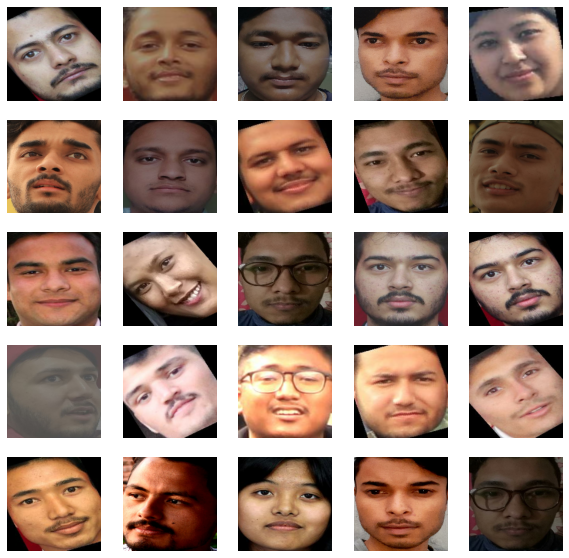

In [24]:
# Visualize training images from the training data batch
train_images = next(train_data.as_numpy_iterator())
show_25_images(train_images)

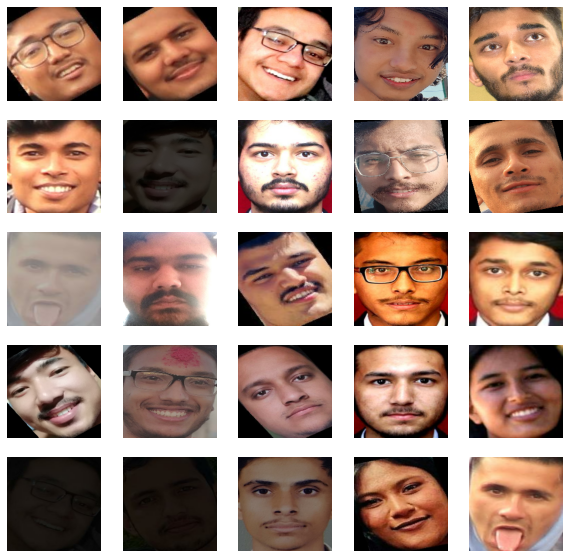

In [25]:
# Visualize validation images from the validation data batch
val_images=next(val_data.as_numpy_iterator())
show_25_images(val_images)

## Building a model

In [26]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

In [27]:
INPUT_SHAPE

[None, 160, 160, 3]

In [28]:
#find embeddings
model = load_model('model/facenet_keras.h5')
X_train_emb = model.predict(train_data)
X_val_emb = model.predict(val_data)

In [29]:
# we have embedding of images
X_train_emb.shape

(9926, 128)

In [30]:
X_val_emb.shape

(2482, 128)

In [31]:
X_train_emb

array([[-1.376285  ,  0.5355247 , -0.5855451 , ..., -0.36746833,
        -0.02219566,  0.95566076],
       [ 1.2284219 ,  0.35791185, -1.7753664 , ..., -1.919804  ,
         0.8087629 , -2.256214  ],
       [ 0.07377901, -1.2432272 , -1.1596535 , ..., -1.110145  ,
         0.42212015,  1.8909677 ],
       ...,
       [-0.37838474,  1.7359577 ,  0.72081584, ..., -1.0498617 ,
        -0.9535843 ,  0.07176886],
       [ 0.4100781 ,  0.78225887, -0.28810334, ..., -1.5640368 ,
         0.44758737, -0.3376297 ],
       [ 0.8678285 , -1.1033516 , -0.67188716, ..., -1.1571777 ,
         0.35382006, -0.5362208 ]], dtype=float32)

In [32]:
X_val_emb

array([[-1.7775819e-03, -8.4912515e-01, -2.1283288e+00, ...,
        -1.6157774e+00, -6.0585505e-01, -7.9670972e-01],
       [-9.4070172e-01,  5.6631052e-01, -1.0353241e+00, ...,
        -5.9236044e-01,  2.9975539e-01, -6.4332718e-01],
       [ 5.5255109e-01, -5.1752770e-01, -6.3572663e-01, ...,
        -1.3776838e+00, -1.4292555e-01, -1.5179494e-01],
       ...,
       [ 4.2509189e-01,  1.0514930e+00, -6.8108338e-01, ...,
        -6.7142135e-01, -8.9806445e-02,  1.1489514e+00],
       [-8.1414306e-01,  9.6419287e-01, -1.1368607e+00, ...,
        -8.2661992e-01,  4.9858147e-01, -1.2437649e+00],
       [-9.4669223e-01, -2.6297754e-01,  4.6470970e-01, ...,
        -6.5276124e-02,  1.8541121e-01, -1.2302318e+00]], dtype=float32)

## now svc 

In [33]:
#normalize the embedded data
in_encode = Normalizer(norm='l2')
X_train_emb_nom = in_encode.transform(X_train_emb)
X_val_emb_nom = in_encode.transform(X_val_emb)

In [34]:
X_train_emb_nom,X_train_emb_nom.shape,type(X_train_emb_nom)

(array([[-0.10580423,  0.04116936, -0.04501477, ..., -0.02824975,
         -0.00170633,  0.07346803],
        [ 0.09602308,  0.02797719, -0.13877654, ..., -0.15006691,
          0.06321924, -0.17636333],
        [ 0.0061334 , -0.10335203, -0.09640437, ..., -0.09228862,
          0.03509171,  0.15720001],
        ...,
        [-0.0293755 ,  0.13476926,  0.05595978, ..., -0.08150491,
         -0.07403052,  0.0055717 ],
        [ 0.03469625,  0.06618605, -0.0243761 , ..., -0.13233142,
          0.03786987, -0.02856647],
        [ 0.09918519, -0.12610342, -0.07679081, ..., -0.13225527,
          0.04043853, -0.06128534]], dtype=float32),
 (9926, 128),
 numpy.ndarray)

In [35]:
y_train

array(['KCE074BCT043', 'KCE074BCT005', 'KCE074BCT024', ...,
       'KCE074BCT022', 'KCE074BCT004', 'KCE074BCT028'], dtype='<U12')

In [36]:
#define svm classifier model new variable C=CLoseness aaded
model_svc =SVC(kernel='poly',degree=5, probability=True,C=100)
model_svc.fit(X_train_emb_nom,y_train)

SVC(C=100, degree=5, kernel='poly', probability=True)

In [37]:
model_svc.score(X_train_emb_nom,y_train)

0.9976828531130365

In [38]:
model_svc.score(X_val_emb_nom,y_val)

0.9721998388396454

In [39]:
y_preds=model_svc.predict(X_val_emb_nom)

In [40]:
model_svc.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 5,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [41]:
from sklearn.model_selection import GridSearchCV
grid={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],'class_weight': ['balanced',None],'C': [ 1,10,100,200]}
model_svc_best=GridSearchCV(estimator=model_svc,param_grid=grid,cv=5,verbose=2)
model_svc_best.fit(X_train_emb_nom,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   9.1s
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   9.2s
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   9.4s
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   8.7s
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   9.2s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=  18.2s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=  19.8s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=  19.3s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=  19.3s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=  18.4s
[CV] END .............C=1, class_weight=balanced, kernel=rbf; total time=  17.5s
[CV] END .............C=1, class_weight=balance

[CV] END ............C=100, class_weight=None, kernel=linear; total time=   8.6s
[CV] END ............C=100, class_weight=None, kernel=linear; total time=   8.2s
[CV] END ............C=100, class_weight=None, kernel=linear; total time=   7.6s
[CV] END ............C=100, class_weight=None, kernel=linear; total time=   9.0s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=  22.1s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=  20.6s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=  20.5s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=  21.1s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=  22.4s
[CV] END ...............C=100, class_weight=None, kernel=rbf; total time=  15.5s
[CV] END ...............C=100, class_weight=None, kernel=rbf; total time=  15.7s
[CV] END ...............C=100, class_weight=None, kernel=rbf; total time=  16.6s
[CV] END ...............C=10

GridSearchCV(cv=5,
             estimator=SVC(C=100, degree=5, kernel='poly', probability=True),
             param_grid={'C': [1, 10, 100, 200],
                         'class_weight': ['balanced', None],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [42]:
model_svc_best.best_estimator_

SVC(C=200, degree=5, kernel='poly', probability=True)

In [43]:
from sklearn.metrics import precision_score
## precesion=tp / (tp + fp)
print(precision_score(y_val, y_preds, average='macro'))
print(precision_score(y_val, y_preds, average='micro'))
print(precision_score(y_val, y_preds, average='weighted'))

0.972597125885372
0.9721998388396454
0.9726728280470462


In [44]:
from sklearn.metrics import recall_score
print(recall_score(y_val, y_preds, average='macro'))
print(recall_score(y_val, y_preds, average='micro'))
print(recall_score(y_val, y_preds, average='weighted'))

0.9722506492002855
0.9721998388396454
0.9721998388396454


In [45]:
#F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
print(f1_score(y_val, y_preds, average='macro'))
print(f1_score(y_val, y_preds, average='micro'))
print(f1_score(y_val, y_preds, average='weighted'))

0.9721042126211897
0.9721998388396454
0.9721136986139151


In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_mat=confusion_matrix(y_val,y_preds)
print('Confusion matrix : \n',conf_mat)

Confusion matrix : 
 [[57  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  0]
 [ 0  0 55 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  1]
 [ 0  0  0 ...  0 58  0]
 [ 0  0  0 ...  0  1 66]]


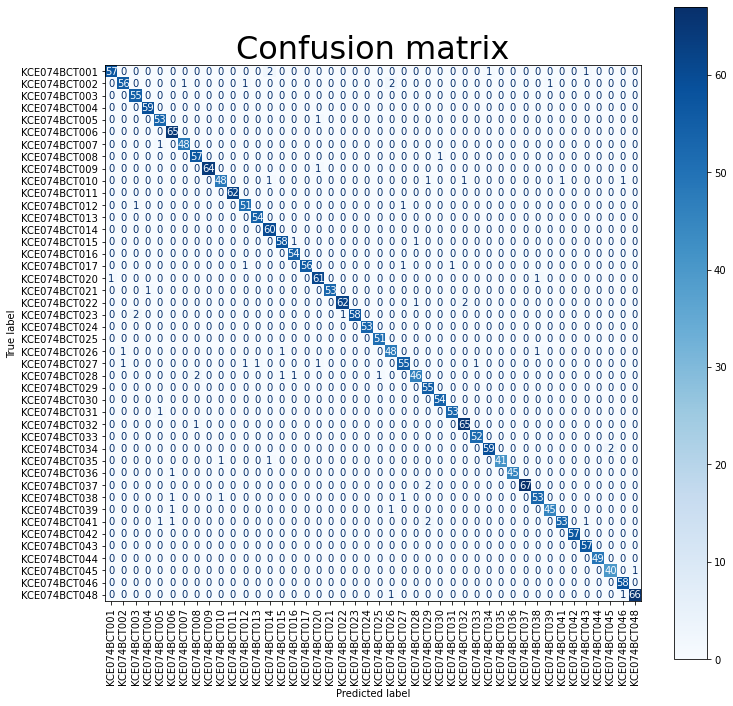

In [47]:
from sklearn.metrics import plot_confusion_matrix
title= "Confusion matrix"
fig, ax = plt.subplots(figsize=(12, 12))
disp = plot_confusion_matrix(model_svc, X_val_emb_nom, y_val,cmap=plt.cm.Blues,ax=ax)
plt.title(title,fontsize=32)
plt.xticks(rotation='vertical')
plt.show()

# RANDOM FOREST

In [48]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
randomforest=RandomForestClassifier(n_estimators=10)

In [49]:
#Train the model using the training sets y_pred=clf.predict(X_test)
randomforest.fit(X_train_emb_nom,y_train)

RandomForestClassifier(n_estimators=10)

In [50]:
#predict
y_preds_rf=randomforest.predict(X_val_emb_nom)

In [51]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_preds_rf))

Accuracy: 0.9262691377921032


In [52]:
#precision 
print(precision_score(y_val, y_preds_rf, average='macro'))
print(precision_score(y_val, y_preds_rf, average='micro'))
print(precision_score(y_val, y_preds_rf, average='weighted'))

0.9289989042788633
0.9262691377921032
0.928804380734723


In [53]:
print(recall_score(y_val, y_preds_rf, average='macro'))
print(recall_score(y_val, y_preds_rf, average='micro'))
print(recall_score(y_val, y_preds_rf, average='weighted'))

0.927220862181141
0.9262691377921032
0.9262691377921032


In [54]:
print(f1_score(y_val, y_preds_rf, average='macro'))
print(f1_score(y_val, y_preds_rf, average='micro'))
print(f1_score(y_val, y_preds_rf, average='weighted'))

0.9268636307631101
0.9262691377921032
0.9262678354153878


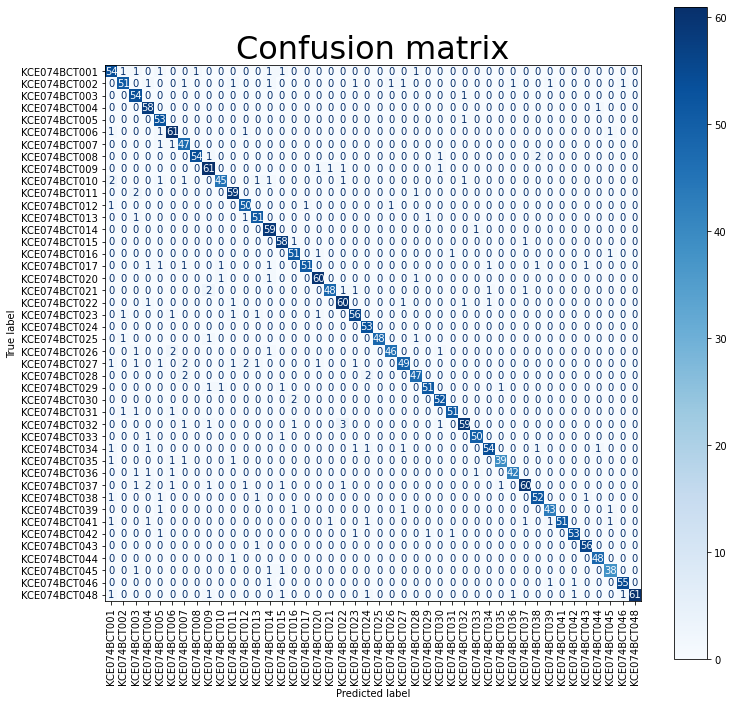

In [55]:
title= "Confusion matrix"
fig, ax = plt.subplots(figsize=(12, 12))
disp = plot_confusion_matrix(randomforest, X_val_emb_nom, y_val,cmap=plt.cm.Blues,ax=ax)
plt.title(title,fontsize=32)
plt.xticks(rotation='vertical')
plt.show()

# Knn algorithm

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knnNeigh = KNeighborsClassifier(n_neighbors=5)
knnNeigh.fit(X_train_emb_nom,y_train)

KNeighborsClassifier()

In [57]:
y_preds_knn=knnNeigh.predict(X_val_emb_nom)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_val, y_preds_knn))

Accuracy: 0.9323126510878323


In [59]:
#precision 
print(precision_score(y_val, y_preds_knn, average='macro'))
print(precision_score(y_val, y_preds_knn, average='micro'))
print(precision_score(y_val, y_preds_knn, average='weighted'))

0.9370220484673267
0.9323126510878323
0.9372782034619666


In [60]:
##recall
print(recall_score(y_val, y_preds_knn, average='macro'))
print(recall_score(y_val, y_preds_knn, average='micro'))
print(recall_score(y_val, y_preds_knn, average='weighted'))

0.9330132289034118
0.9323126510878323
0.9323126510878323


In [61]:
#f1 score
print(f1_score(y_val, y_preds_knn, average='macro'))
print(f1_score(y_val, y_preds_knn, average='micro'))
print(f1_score(y_val, y_preds_knn, average='weighted'))

0.9333411607878712
0.9323126510878323
0.9331514450320787


# logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(random_state=0,penalty='l2').fit(X_train_emb_nom,y_train)
y_preds_lr=logisticReg.predict(X_val_emb_nom)
print("Accuracy:",metrics.accuracy_score(y_val, y_preds_lr))

Accuracy: 0.919822723609992


In [63]:
#precision 
print(precision_score(y_val, y_preds_lr, average='macro'))
print(precision_score(y_val, y_preds_lr, average='micro'))
print(precision_score(y_val, y_preds_lr, average='weighted'))

0.9402101919747704
0.919822723609992
0.9414377347729039


In [64]:
##recall
print(recall_score(y_val, y_preds_lr, average='macro'))
print(recall_score(y_val, y_preds_lr, average='micro'))
print(recall_score(y_val, y_preds_lr, average='weighted'))

0.9210542057734884
0.919822723609992
0.919822723609992


In [65]:
#f1 score
print(f1_score(y_val, y_preds_lr, average='macro'))
print(f1_score(y_val, y_preds_lr, average='micro'))
print(f1_score(y_val, y_preds_lr, average='weighted'))

0.9263456817543934
0.919822723609992
0.9264131332546609


# Check on Sample Image

In [85]:
image=process_image('1.jpg')

In [86]:
image

<tf.Tensor: shape=(160, 160, 3), dtype=float32, numpy=
array([[[0.08583333, 0.0779902 , 0.0897549 ],
        [0.07884774, 0.0710046 , 0.0827693 ],
        [0.07487746, 0.06703432, 0.07879902],
        ...,
        [0.21632048, 0.16252145, 0.15823224],
        [0.23607774, 0.19294049, 0.18509735],
        [0.25004902, 0.20691179, 0.19906865]],

       [[0.08102942, 0.07318628, 0.08495098],
        [0.07732844, 0.0694853 , 0.08125   ],
        [0.07355393, 0.06571079, 0.0774755 ],
        ...,
        [0.20644456, 0.1522733 , 0.14810815],
        [0.20538849, 0.15828063, 0.15176103],
        [0.20779413, 0.16068628, 0.15416667]],

       [[0.07622549, 0.06838235, 0.08014706],
        [0.07252452, 0.06468138, 0.07644609],
        [0.07074908, 0.06290594, 0.07467065],
        ...,
        [0.21222429, 0.15732232, 0.15340075],
        [0.21597742, 0.16107544, 0.15715387],
        [0.20441177, 0.14950982, 0.14558825]],

       ...,

       [[0.08063726, 0.08455883, 0.09240197],
        [0.07

In [105]:
image_1=tf.expand_dims(image, axis=0)

In [106]:
image_1

<tf.Tensor: shape=(1, 160, 160, 3), dtype=float32, numpy=
array([[[[0.08583333, 0.0779902 , 0.0897549 ],
         [0.07884774, 0.0710046 , 0.0827693 ],
         [0.07487746, 0.06703432, 0.07879902],
         ...,
         [0.21632048, 0.16252145, 0.15823224],
         [0.23607774, 0.19294049, 0.18509735],
         [0.25004902, 0.20691179, 0.19906865]],

        [[0.08102942, 0.07318628, 0.08495098],
         [0.07732844, 0.0694853 , 0.08125   ],
         [0.07355393, 0.06571079, 0.0774755 ],
         ...,
         [0.20644456, 0.1522733 , 0.14810815],
         [0.20538849, 0.15828063, 0.15176103],
         [0.20779413, 0.16068628, 0.15416667]],

        [[0.07622549, 0.06838235, 0.08014706],
         [0.07252452, 0.06468138, 0.07644609],
         [0.07074908, 0.06290594, 0.07467065],
         ...,
         [0.21222429, 0.15732232, 0.15340075],
         [0.21597742, 0.16107544, 0.15715387],
         [0.20441177, 0.14950982, 0.14558825]],

        ...,

        [[0.08063726, 0.08455883, 

In [88]:
image_data=model.predict(image_1)

In [89]:
image_data

array([[ 0.21008334,  1.0165343 ,  0.9471274 ,  1.9319386 , -2.0069697 ,
         0.7224956 , -0.6939493 , -0.15844825,  1.1035749 , -0.49693006,
         1.0073403 , -0.5918253 ,  1.0029409 , -1.0591623 , -0.6489141 ,
         1.7130888 , -0.43762353,  0.9184412 ,  0.40546525,  0.80943465,
         0.5608685 ,  0.7384958 ,  1.7410512 , -0.436122  ,  0.02993262,
        -0.68134594,  0.0406158 ,  0.08236709, -1.6350818 , -1.0771338 ,
        -2.7356067 , -0.43008062, -1.1369911 , -0.10137394,  2.2327075 ,
         0.2527727 ,  0.11320405,  0.09922782,  0.7526818 ,  0.7477026 ,
         0.76163536,  0.347556  ,  0.44998735, -1.1598259 ,  0.9997831 ,
         0.4490977 ,  0.41108903, -0.25401142,  1.8495762 ,  2.2205772 ,
        -0.18240115, -0.27768484,  1.3830029 , -0.14096403,  0.951682  ,
        -0.02425618,  0.65787464, -0.11924523,  1.3659456 ,  0.7856891 ,
         1.9367404 ,  0.6309222 ,  0.84766126, -0.2438002 ,  0.88329595,
        -0.5761045 ,  0.8527047 , -0.29788584, -2.0

In [99]:
in_encode = Normalizer(norm='l2')
image_nom = in_encode.transform(image_data)

In [100]:
raw_predict=model_svc.predict_proba(image_nom)
percent=raw_predict[0]*100
percent.astype(int)

array([ 1,  2,  2,  1,  1,  7,  0,  1,  2,  2,  0,  2,  1,  1,  1, 10,  2,
        2,  2,  4, 12,  0,  1,  1,  2,  2,  0,  2,  1,  2,  1,  0,  1,  0,
        1,  0,  6,  0,  1,  0,  3,  1,  0,  0])

In [103]:
if raw_predict.max()>0.2:
    result=model_svc.predict(image_nom)
else:
    result="no"

In [104]:
result

'no'

In [93]:
randomforest.predict(image_nom)

array(['KCE074BCT006'], dtype='<U12')

In [94]:
randomforest.predict_proba(image_nom)

array([[0. , 0. , 0. , 0. , 0. , 0.2, 0.1, 0. , 0. , 0. , 0.1, 0. , 0.1,
        0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0.2,
        0. , 0. , 0. , 0. , 0. ]])

In [76]:
import datetime
pickle.dump(model_svc,open("model/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+"_svc.pk","wb"))